<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estadística-II" data-toc-modified-id="Estadística-II-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estadística II</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Percentiles" data-toc-modified-id="Percentiles-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Percentiles</a></span></li><li><span><a href="#Rangos-intercuartílicos" data-toc-modified-id="Rangos-intercuartílicos-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Rangos intercuartílicos</a></span></li><li><span><a href="#Cálculo-de-estadísticos-usando-Pandas" data-toc-modified-id="Cálculo-de-estadísticos-usando-Pandas-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Cálculo de estadísticos usando Pandas</a></span></li><li><span><a href="#Creación-de-gráfico-de-cajas-(boxplot)-usando-los-rangos-intercuartílicos" data-toc-modified-id="Creación-de-gráfico-de-cajas-(boxplot)-usando-los-rangos-intercuartílicos-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Creación de gráfico de cajas (boxplot) usando los rangos intercuartílicos</a></span></li></ul></li><li><span><a href="#Tablas-de-frecuencias" data-toc-modified-id="Tablas-de-frecuencias-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tablas de frecuencias</a></span><ul class="toc-item"><li><span><a href="#Tabla-de-frecuencias-de-variables-categóricas-(cualitativas)" data-toc-modified-id="Tabla-de-frecuencias-de-variables-categóricas-(cualitativas)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Tabla de frecuencias de variables categóricas (cualitativas)</a></span></li><li><span><a href="#Tabla-de-frecuencias-de-variables-numéricas-(cuantitativas)" data-toc-modified-id="Tabla-de-frecuencias-de-variables-numéricas-(cuantitativas)-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Tabla de frecuencias de variables numéricas (cuantitativas)</a></span></li><li><span><a href="#Calculo-de-frecuencias-acumuladas" data-toc-modified-id="Calculo-de-frecuencias-acumuladas-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Calculo de frecuencias acumuladas</a></span></li><li><span><a href="#Representación-gráfica-de-la-tabla-de-frecuencias" data-toc-modified-id="Representación-gráfica-de-la-tabla-de-frecuencias-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Representación gráfica de la tabla de frecuencias</a></span></li></ul></li></ul></li></ul></div>

En al lección de hoy seguiremos aprendiendo algunos conceptos básicos sobre estadística, los cuáles nos ayudarán a sentar las bases para desenvolvernos mejor en el módulo 3. En la lección de hoy aprenderemos: 

- Qué son los percentiles y los rangos intercuartílicos. 

- Qué son las tablas de frecuencias

In [22]:
# como cada día lo primero que haremos es importar las librerías 
import numpy as np
from scipy import stats # importando scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

Para este jupyter seguiremos utilizandoel *dataset* que nos descargaremos ayer de `pydataset. Recordemos que información teníamos en este dataset: 

- `state`: un código numérico que identifica el país. 

- `year`: el año en el que se recopilo la información (desde el 63 al 92). 

- `price`: el precio del paquete de cigarrillos. 

- `pop`: la población que había en ese momento

- `pop 16`: la población con más de 16 años. 

- `cpi`: índice de precios al consumo

- `ndi`: renta per cápita

- `sales`: las ventas de paquetes de cigarillos per cápita

- `pimin`: precio mínimo en los estados limítrofes por paquete de cigarrillos

In [23]:
# cargamos el dataset usando la librería pydataset. 

df_cigar = data("Cigar")
df_cigar.head()

,state,year,price,pop,pop16,cpi,ndi,sales,pimin
1,1,63,28.6,3383.0,2236.5,30.6,1558.304530,93.9,26.1
2,1,64,29.8,3431.0,2276.7,31.0,1684.073202,95.4,27.5
3,1,65,29.8,3486.0,2327.5,31.5,1809.841875,98.5,28.9
4,1,66,31.5,3524.0,2369.7,32.4,1915.160357,96.4,29.5
5,1,67,31.6,3533.0,2393.7,33.4,2023.546368,95.5,29.6


Para la lección de hoy necesitaremos una variable categórica, así que lo primero que vamos a hacer es convertir la columna de `pop` que nos daba la información de la población en ese momento. Para eso nos vamos a crear una función para categorizar de la siguiente forma: 

- Si la poblacion es menor que 10000 pondremos el valor de "baja"

- Si la poblacion esta entre 10000 y 20000 pondremos el valor de "media"

- Si la poblacion es mayor que 20000 pondremos el valor de "alta"

Para esto a parte de la función usaremos un apply de los que aprendimos en las lecciones de Pandas. 

In [24]:
# definimos la función
def cambiar_poblacion(col):
    if col <= 10000:
        return "baja"
    elif col > 10000 and col <= 20000:
        return "media"
    else:
        return "alta"

In [25]:
# aplicamos la función a nuestra columna
df_cigar["pop_cat"] = df_cigar["pop"].apply(cambiar_poblacion)

In [26]:
# comprobamos que los cambios se han hecho correctamente: 

df_cigar["pop_cat"].value_counts()

baja     1188
media     170
alta       22
Name: pop_cat, dtype: int64

# Percentiles y Rangos intercuartílicos

## Percentiles

Un percentil es una medida estadística para comparar resultados, y saber cómo está situado un valor en función de una muestra. Lo que pasará cuando calculamos percentiles es ordenar los datos de menor a mayor y dividirlos en cien partes iguales. 

Los percentiles son muy conocidos por su uso en los percentiles de crecimiento de los niños. Por ejemplo, si el peso de un bebé está en el percentil 65, quiere decir que el 65% de los bebés de la misma edad pesan igual o menos. Cuando estamos hablando del crecimiento de los niños, un percentil va a permitir comparar los datos de un niño con los de otros niños de sus mismas características (de la misma edad y sexo), por eso se dice que es un estadístico que nos ayuda a comparar resultados.

Para calcular los percentiles usaremos el método de Numpy `np.percentile()` 

En el método `.percentile()`, el parámetro . Puedes consultarlos en la documentación de Numpy.

```python
    np.percentile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
```

Donde: 

- `q`: representa el número de cálculo del percentil. 

- `a`: representa un *array* de datos o la columna sobre la que queremos calcular el percentil. 

- los demás parámetros son opcionales.


In [27]:
# Calculamos el percentil 99
percentil99 = np.percentile(df_cigar["price"], 99)
print("El percentil 99 es:", percentil99)

El percentil 99 es: 181.57600000000022


**¿Qué significa este valor?**

Lo que nos indica es que el 99% de nuestros productos tienen un precio inferior a 181.57$. O lo que es lo mismo, que el 1% de los datos(de los paquetes de tabaco) tiene un precio superior a 181.57$. LLegados a este punto, tenemos que destacar el percentil 50, que corresponderá con la mediana, pero esto no nos debe sorprender porque como aprendimos ayer, la mediana solo es la media física de nuestros datos. Comprobemoslo! 

In [28]:
# calculamos el percentil 50
percentil50 = np.percentile(df_cigar["price"], 50)
print("El percentil 50 es:", percentil50)

# calculamos la mediana
print("La mediana es: ", df_cigar["price"].median())


# es decir, el 50% de los datos tienen un precio de paquete de tabaco inferior a 52.3%.

El percentil 50 es: 52.3
La mediana es:  52.3


Antes de pasar a los rangos intercuartílicos es importante destacar que en estadística hay tres de percentiles que son importantes y que usaremos de forma recurrente como analistas de datos: 

- percentil 25: también llamado Q1

- percentil 50: también llamado Q2, es importante porque corresponde con la mediana. 

- percentil 75: también llamado Q3

Tanto el Q1 como el Q3 los usaremos para entender los rangos intercuartílicos 👇🏽. 

## Rangos intercuartílicos (IQR)

Es una medida de dispersión estadística (recordemos que otras medidas de dispersión eran la varianza, la desviación estándar, etc.), siendo igual a la diferencia entre los cuartiles 75 y 25. Por lo tanto, vienen definidos por la siguiente fórmula: 

IQR = Q3  -  Q1 . 

Pero... ¿qué es esto de los cuartiles? Los cuartiles se calculan de la misma manera que los percentiles pero dividiendo los datos en 4 intervalos en vez de en 100.


Ahora nos podemos preguntar para que sirven estos rangos intercuartílicos, nosotras como analistas de datos los usaremos para identificar valores extremos o *outliers*, que aunque todavía no sepamos lo que es lo aprenderemos a lo largo de este módulo. Por lo tanto, es importante que los recordemos para el futuro. 


 Este estadístico se usa normalmente en los diagramas de caja (o *boxplots*) en los cuales se utiliza la mediana como medida central y el rango intercuartílico como la zona en la que estarán la mayoría de los datos, son los datos que hay en la caja del *boxplot*. 

El rango intercuartílico es considerado un estadístico robusto debido a que solo se consideran las observaciones entre el tercer cuartil y el primer cuartil (descartando valores muy grandes o muy pequeños de los datos). Por el contrario, la mediana, la media, la varianza, etc., sufrirán variaciones mucho más grandes que el rango intercuartílico debido a la presencia de dichos valores atípicos.

Para el cálculo del rango intercuartílico con Python podemos pensar en los cuartiles como los percentiles 25, 50, 75 y 100. Por lo tanto, usando Numpy y su método `.percentile()` podemos lograr el objetivo de calcularlo:

In [29]:
# Calculamos los percentiles 75 y 25 (que serían el tercer y primer cuartil)
q3, q1 = np.percentile(df_cigar["price"], [75, 25])

# Calculamos el rango intercuartílico como la resta de los valores del tercer y primer cuartil
riq = q3 - q1
print("El rango intercuartílico es:", riq)

El rango intercuartílico es: 63.324999999999996


**Ejercicio**: Calcula el percentil 60 de un conjunto de datos aleatorios de 100 elementos. ¿Qué significa ese valor?

In [30]:
valores = np.random.randint(1, 100, (50))

In [31]:
valores

array([64, 80, 58, 40,  6, 10, 15, 91, 33, 78, 92, 43, 46, 74, 97, 20, 96,
       89, 45, 36, 87, 14, 31, 82, 66, 40,  6, 88, 38, 39, 13, 98,  7, 90,
       92, 65, 32, 94, 81, 68, 57, 55, 67, 71, 82, 81, 66,  1, 12, 85])

In [32]:
np.percentile(valores,60) # Significa que el 60% de los datos están por debajo del 62

69.19999999999999

**Ejercicio:**

Crea un *dataset* partiendo de un Numpy *array* con una fila de 50 datos aleatorios y calcula su media, mediana, moda, máximo y mínimo, haciendo uso de los métodos de pandas.

In [33]:
df_valores = pd.DataFrame(valores)
df_valores.head(2)

,0
0,64
1,80


In [34]:
print('media:', df_valores[0].mean())
print('mediana:', df_valores[0].median())
print('moda:', df_valores[0].mode()[0])
print('max:', df_valores[0].max())
print('min:', df_valores[0].min())

media: 56.42
mediana: 64.5
moda: 6
max: 98
min: 1


### Creación de gráfico de cajas (boxplot) usando los rangos intercuartílicos

Como indicamos en la sección en la que describimos los cuartiles y los rangos intercuartílicos, estos se usan para la detección de *outliers* (valores inusualmente altos o bajos). Es interesante usar gráficos de cajas para mostrar por pantalla los rangos en los que esperamos que se encuentren los valores normales de los datos, y resaltar aquellos datos concretos que se salen de esa estimación. Es decir, utilizaremos este tipo de visualización para ver visualmente si tenemos valores extremos y donde están. 

Veamos un ejemplo con nuestros datos: 

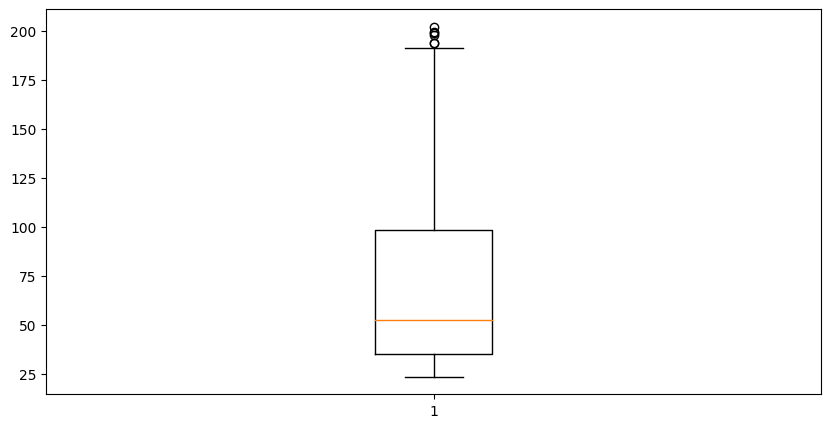

In [35]:
# Establecemos el tamaño de la gráfica
fig = plt.figure(figsize = (10,5))

# creamos el boxplot
plt.boxplot(df_cigar["price"]);


Los diagramas de cajas nos muestran, para cada conjunto de datos, su mediana, sus rangos intercuartílicos, sus *outliers* (si así los tuvieramos), etc.

## Tablas de frecuencias

Una tabla de frecuencias muestra de forma ordenada un conjunto de datos estadísticos y a cada uno de ellos le asigna una frecuencia que, en pocas palabras, son las veces que se repite un número o dato. 

**Tipos de frecuencias**

- Frecuencias absolutas: son el número de veces que se repite un número en un conjunto de datos. Pongamos un ejemplo imaginemos que tiramos una moneda 50 veces y salen 35 caras, es decir, la frecuencia absoluta es de 35 para las caras y 15 para las cruces. 



- Frecuencia relativa: corresponde a las veces que se repite un número o categoría en un conjunto de datos respecto al total, pero se expresa en porcentajes (%).



- Frecuencias absolutas acumuladas: es la suma de las frecuencias absolutas. - Frecuencia relativa acumulada: es la suma de las frecuencias relativas.




La forma más sencilla de estadística es agrupar los datos y contarlos. Una tabla de frecuencias es la herramienta que nos ayuda a visualizar los resultados de esos agrupamientos y conteos de manera fácil. 

Para construir nuestra primera tabla de frecuencias, vamos a descargar unos datos públicos con Pandas y a usar métodos asociados a los *DataFrame*:

In [36]:
df_cigar.head(2)

,state,year,price,pop,pop16,cpi,ndi,sales,pimin,pop_cat
1,1,63,28.6,3383.0,2236.5,30.6,1558.304530,93.9,26.1,baja
2,1,64,29.8,3431.0,2276.7,31.0,1684.073202,95.4,27.5,baja


### Tabla de frecuencias absolutas de variables categóricas (cualitativas)

En el `DataFrame` anterior, la columna `pop_cat` es una variable cualitativa ya que puede tomar valores de entre tres diferentes categorías: "alta", "media" y "baja". Podemos conocer el conteo de cuántas entradas (filas) hay en el `DataFrame` asociadas a cada una de las categorías:

In [37]:
# Primero agrupamos el dataframe por la columna pop_cat
df_group = df_cigar.groupby("pop_cat").count().reset_index() # Devolvera un objeto DataFrameGroupBy
df_group

,pop_cat,state,year,price,pop,pop16,cpi,ndi,sales,pimin
0,alta,22,22,22,22,22,22,22,22,22
1,baja,1188,1188,1188,1188,1188,1188,1188,1188,1188
2,media,170,170,170,170,170,170,170,170,170


Esta tabla nos esta dando las frecuencias absolutas de nuestros datos, y lo que nos está diciendo es que cada una de las categorías que tenemos en nuestra columna `pop_cat` tienen 22, 1188 y 170 datos.  Si recordamos esta tabla no tenía valores nulos, y es por esto que en todas las columnas tenemos el mismo valor. Pero si tuvieramos nulos en alguna de las columnas, estos valores podrían diferir. 

### Tabla de frecuencias absoluta de variables numéricas (cuantitativas)


Ahora nos podría surgir la duda de si esto lo podemos hacer con variables numéricas. Y la respuesta  es si, en este caso tendríamos que usar un groupby de los que aprendimos en lecciones anteriores de Pandas. En este caso trabajaremos con la columna `pimin` que nos devolvía los precios mínimos de los estados limítrofes.  


In [38]:
df_price = df_cigar.groupby("pimin").count().reset_index().sort_values(by = "state", ascending = False)
df_price.head()

,pimin,state,year,price,pop,pop16,cpi,ndi,sales,pop_cat
55,30.1,18,18,18,18,18,18,18,18,18
53,29.9,16,16,16,16,16,16,16,16,16
21,26.2,15,15,15,15,15,15,15,15,15
7,24.7,15,15,15,15,15,15,15,15,15
155,43.4,14,14,14,14,14,14,14,14,14


En el código anterior realizamos el proceso de agrupar las entradas por una de las columnas, en este caso `pimin`.  Después, usamos el `count` para saber cuántas veces aparece cada valores, lo convertimos a *dataframe* con `reset_index`, por último hemos ordenado los valores de mayor  a menor en base a la columna de estado. 

En este caso podemos ver como el `pimin` con valor 30.1 aparece 18 veces, el valor 29.9 aparece 16 veces y así para el resto de los valores. 

### Tabla de frecuencias relativa

Como dijimos la inicio, las frecuencias relativas se expresan en porcentaje, y hace referencia a las veces que aparece respecto al total de datos que tenemos en nuestro df. Por lo tanto, lo que tendremos que hacer es simplemente dividir las frecuencias absolutas obtenidas previamente entre el total de datos que tenemos en nuestro set de dato. 

Recordemos que el total de filas que tenemos lo podemos sacar usando el método `. shape` de Pandas. Veámoslo con un ejemplo: 


In [39]:
# recordemos el df_group

df_group

,pop_cat,state,year,price,pop,pop16,cpi,ndi,sales,pimin
0,alta,22,22,22,22,22,22,22,22,22
1,baja,1188,1188,1188,1188,1188,1188,1188,1188,1188
2,media,170,170,170,170,170,170,170,170,170


In [40]:
# en este caso vamos a usar la tabla de frecuencias relativas que creamos para la columna `pop_cat` y luego vamos a dividir todos los valores entre el total de filas que tenemos en el df. 

df_group / df_cigar.shape[0]

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Vaya.. un error, y esto es porque en nuestro df tenemos una columna que es de tipo *string* y no podemos dividir un *string* entre un número. Por lo tanto, tendremos que hacerlo de otra forma, veamos como: 

In [41]:
# lo primero que hacemos es quedarnos con todas las columnas menos la que contiene strings. Para eso usaremos un drop

df_group_sin_strings = df_group.drop("pop_cat", axis = 1)
df_group_sin_strings

,state,year,price,pop,pop16,cpi,ndi,sales,pimin
0,22,22,22,22,22,22,22,22,22
1,1188,1188,1188,1188,1188,1188,1188,1188,1188
2,170,170,170,170,170,170,170,170,170


In [44]:
# ahora ya lo tenemos preparado para poder dividir y poder sacar las frecuencias relativas

frecuencia_relativa = (df_group_sin_strings / df_cigar.shape[0]) * 100
frecuencia_relativa

,state,year,price,pop,pop16,cpi,ndi,sales,pimin
0,1.594203,1.594203,1.594203,1.594203,1.594203,1.594203,1.594203,1.594203,1.594203
1,86.086957,86.086957,86.086957,86.086957,86.086957,86.086957,86.086957,86.086957,86.086957
2,12.318841,12.318841,12.318841,12.318841,12.318841,12.318841,12.318841,12.318841,12.318841


In [45]:
# Ahora ya podemos ver las frecuencias pero no sabemos a que categória pertenecen, lo que podemos hacer es lo siguiente

# almacenamos las columnas del dataframe sins strings en una variable

columnas = df_group_sin_strings.columns

# sobreescribimos los valores de las columnas

df_group[columnas] = frecuencia_relativa

# chequeemos ahora el resultado
df_group

,pop_cat,state,year,price,pop,pop16,cpi,ndi,sales,pimin
0,alta,1.594203,1.594203,1.594203,1.594203,1.594203,1.594203,1.594203,1.594203,1.594203
1,baja,86.086957,86.086957,86.086957,86.086957,86.086957,86.086957,86.086957,86.086957,86.086957
2,media,12.318841,12.318841,12.318841,12.318841,12.318841,12.318841,12.318841,12.318841,12.318841


Ahora ya podemos decir que en la categoría "alta" tenemos un 1.59 de los datos, en la "baja" un 86.08 de los datos y en la "media" un 12.31 de los datos. 

**Ejercicio:**  
Dibuja el diagrama de cajas de una distribución de 100 datos aleatorios. Resalta los *outliers* (o valores atípicos). ¿Crees que hay muchos o pocos? ¿Por qué?


In [51]:
aleatorio = np.random.randint(1,100, (100))
df_aleatorio = pd.DataFrame(aleatorio)

In [55]:
df_aleatorio.head(2)

,0
0,36
1,60


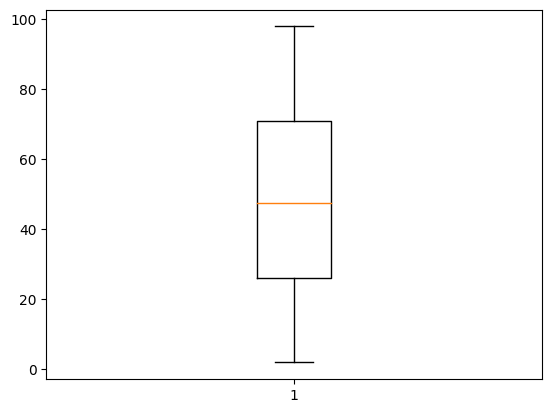

In [56]:
plt.figure()
plt.boxplot(df_aleatorio[0]);

**Ejercicio:**   
Obtén la tabla de frecuencias para la longitud de los pétalos. ¿Cómo están distribuidos los datos en comparación a las longitudes de los sépalos?


In [57]:
df_iris = pd.read_csv('../Visualizacion/iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df_frec = df_iris.groupby("PetalLengthCm").count().reset_index().sort_values(by = "SepalLengthCm", ascending = False)
df_frec.head()

,PetalLengthCm,Id,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
5,1.5,14,14,14,14,14
4,1.4,12,12,12,12,12
21,4.5,8,8,8,8,8
27,5.1,8,8,8,8,8
3,1.3,7,7,7,7,7



**Ejercicio:**   
Escribe el código necesario para representar el histograma de las longitudes de los pétalos.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

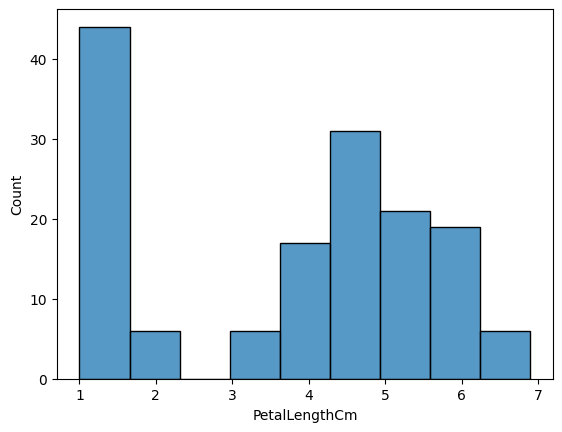

In [61]:
plt.figure()
sns.histplot(df_iris['PetalLengthCm'])